In [1]:
# Import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from newsapi import NewsApiClient
from textblob import TextBlob


In [5]:
# Thiết lập API và lấy dữ liệu
# Khởi tạo NewsAPI client
newsapi = NewsApiClient(api_key='53fbf3706f5040bc9e2787fd3a29bfdf')

In [7]:
# Lấy tin tức về MSFT
all_articles = newsapi.get_everything(q='MSFT', 
                                    language='en',
                                    sort_by='relevancy',
                                    page=1)

In [9]:
# Trích xuất tiêu đề tin tức
news = all_articles["articles"]
news_list = [news_item["title"] for news_item in news]

In [13]:
# Định nghĩa hàm phân tích cảm xúc
def sentiment_analysis(news):
    """Phân tích cảm xúc của văn bản và trả về nhãn."""
    analysis = TextBlob(news)
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity == 0:
        return "neutral"
    else:
        return "negative"

def sentiment_score(news):
    """Tính điểm sentiment của văn bản."""
    analysis = TextBlob(news)
    return analysis.sentiment.polarity

In [17]:
# Thực hiện phân tích cảm xúc
# Phân tích cảm xúc và tính điểm
sentiments = [sentiment_analysis(news) for news in news_list]
scores = [sentiment_score(news) for news in news_list]

# Tạo DataFrame
df = pd.DataFrame({
    'title': news_list,
    'sentiment': sentiments,
    'score': scores
})

(array([0, 1, 2]),
 [Text(0, 0, 'neutral'), Text(1, 0, 'positive'), Text(2, 0, 'negative')])

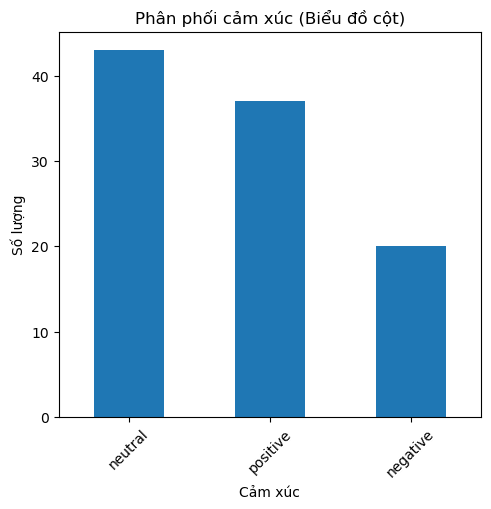

In [21]:
# Biểu đồ cột phân tích cảm xúc
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sentiment_counts = df["sentiment"].value_counts()
sentiment_counts.plot(kind='bar')
plt.title("Phân phối cảm xúc (Biểu đồ cột)")
plt.xlabel("Cảm xúc")
plt.ylabel("Số lượng")
plt.xticks(rotation=45)


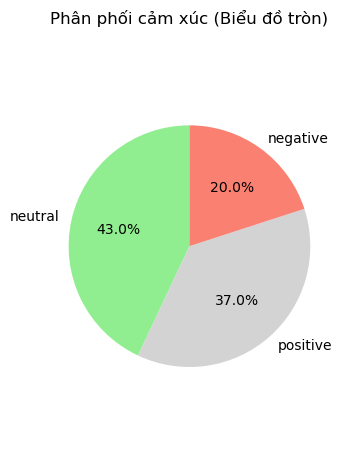

In [25]:
# Biểu đồ tròn phân tích cảm xúc
plt.subplot(1, 2, 2)
colors = ['lightgreen', 'lightgray', 'salmon']
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title("Phân phối cảm xúc (Biểu đồ tròn)")
plt.axis('equal')

plt.tight_layout()
plt.show()

In [29]:
# Tính và hiển thị điểm sentiment trung bình
average_score = df['score'].mean()
print(f"Điểm sentiment trung bình: {average_score:.3f}")

Điểm sentiment trung bình: 0.087


In [33]:
# Hiển thị kết quả chi tiết
print("\nPhân tích chi tiết (sắp xếp theo điểm sentiment):")
print(df.sort_values(by='score', ascending=False))



Phân tích chi tiết (sắp xếp theo điểm sentiment):
                                                title sentiment     score
92  My Favorite "Magnificent Seven" Stocks to Buy ...  positive  0.750000
13  My Favorite "Magnificent Seven" Stocks to Buy ...  positive  0.750000
52  Meta Platforms or Microsoft: Oppenheimer Choos...  positive  0.700000
77  Best Stocks To Buy If Trump Or Harris Wins In ...  positive  0.650000
62     The Best Stocks to Invest $50,000 in Right Now  positive  0.642857
..                                                ...       ...       ...
34  The 4 words Tim Cook uses to defend Apple's la...  negative -0.300000
80         Is It Too Late to Buy Microsoft Stock Now?  negative -0.300000
16  Here's Why 2 Artificial Intelligence (AI) Stoc...  negative -0.300000
11  The S&P 500 is almost never this expensive. It...  negative -0.500000
57  Nvidia stock rises after CEO Jensen Huang tout...  negative -1.000000

[100 rows x 3 columns]


In [37]:
# Thống kê tóm tắt
print("\nThống kê tóm tắt:")
summary_stats = df.groupby('sentiment').agg({
    'score': ['count', 'mean', 'min', 'max']
}).round(3)
print(summary_stats)



Thống kê tóm tắt:
          score                     
          count   mean    min    max
sentiment                           
negative     20 -0.212 -1.000 -0.045
neutral      43  0.000  0.000  0.000
positive     37  0.349  0.062  0.750


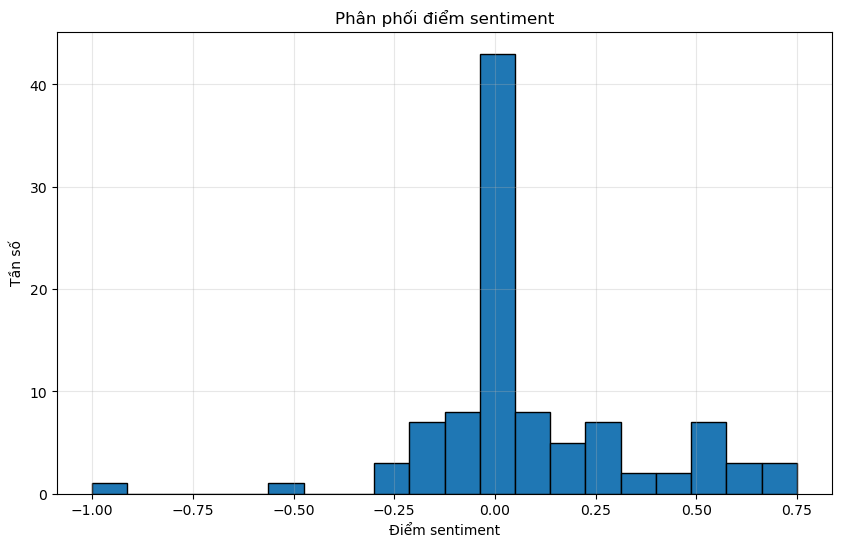

In [39]:
# Biểu đồ phân phối điểm sentiment
plt.figure(figsize=(10, 6))
plt.hist(df['score'], bins=20, edgecolor='black')
plt.title("Phân phối điểm sentiment")
plt.xlabel("Điểm sentiment")
plt.ylabel("Tần số")
plt.grid(True, alpha=0.3)
plt.show()


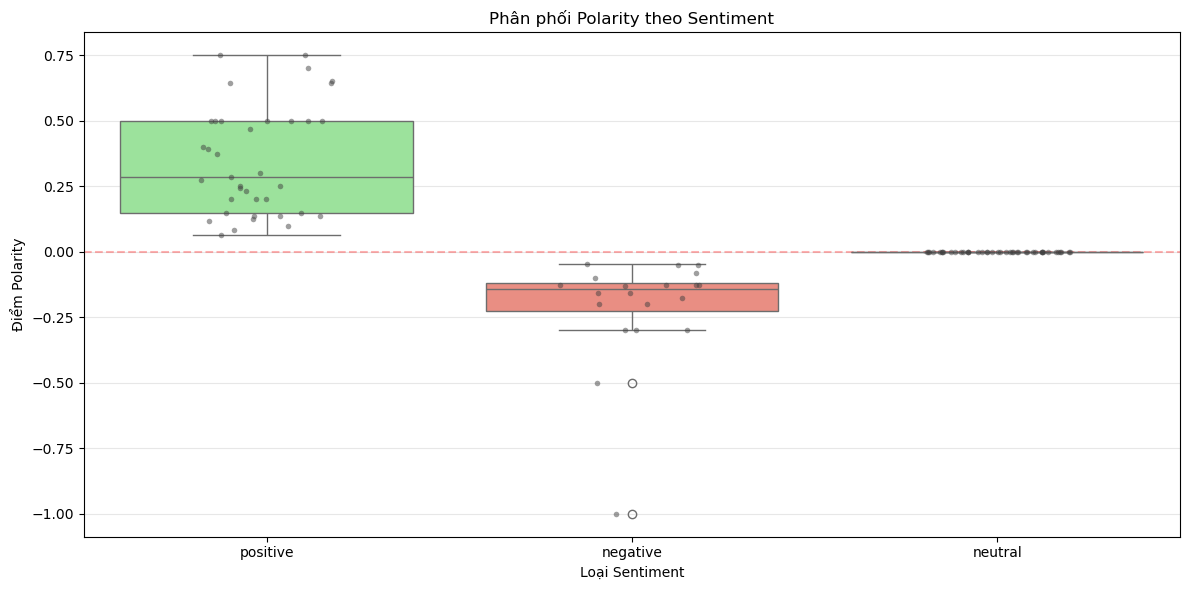

In [43]:
# Biểu đồ Box Plot phân tích phân phối polarity theo sentiment
plt.figure(figsize=(12, 6))

# Tạo box plot với cú pháp của seaborn
sns.boxplot(data=df, 
            x='sentiment', 
            y='score', 
            hue='sentiment',  # Thêm hue parameter
            palette={'positive': 'lightgreen', 
                    'neutral': 'lightgray', 
                    'negative': 'salmon'},
            legend=False)  # Tắt legend vì không cần thiết

# Thay swarmplot bằng stripplot để tránh chồng lấp điểm
sns.stripplot(data=df, 
              x='sentiment', 
              y='score',
              color='0.25',
              alpha=0.5,
              size=4,  # Giảm kích thước điểm
              jitter=0.2)  # Thêm jitter để các điểm không chồng lên nhau

# Chỉnh sửa đồ thị
plt.title("Phân phối Polarity theo Sentiment")
plt.xlabel("Loại Sentiment")
plt.ylabel("Điểm Polarity")

# Thêm lưới ngang để dễ đọc giá trị
plt.grid(True, axis='y', alpha=0.3)

# Thêm đường tham chiếu ở điểm 0
plt.axhline(y=0, color='red', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()